In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from datetime import datetime,date
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

%matplotlib inline
from dateutil.parser import parse
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar(),  normalize=True)


In [45]:
def isWorkingDay(x):
    d = us_bd.rollback(date(x.year, x.month, x.day))
    return d.day == x.day and d.month == x.month and d.year == x.year
with open('tusonload.json') as f:
    datafile = json.load(f)
ldf = pd.DataFrame(datafile['series'][0]['data'], columns=['date', 'load'])
ldf.date = pd.to_datetime(ldf.date)
ldf['work'] = ldf['date'].map(lambda x: isWorkingDay(x))
ldf.set_index(['date'], inplace=True)

ldf = ldf.sort_index()
ldf = ldf[ldf.load < 10000][:'2018-07']
ldf

,load,work
date,,
2015-07-01 08:00:00,1605.0,True
2015-07-01 09:00:00,1537.0,True
2015-07-01 10:00:00,1487.0,True
2015-07-01 11:00:00,1470.0,True
2015-07-01 12:00:00,1503.0,True
2015-07-01 13:00:00,1511.0,True
2015-07-01 14:00:00,1566.0,True
2015-07-01 15:00:00,1612.0,True
2015-07-01 16:00:00,1655.0,True


In [46]:
with open('tusonpredictedload.json') as f:
    datafile = json.load(f)
pldf = pd.DataFrame(datafile['series'][0]['data'], columns=['date', 'pload'])
pldf.date = pd.to_datetime(pldf.date)
pldf.set_index(['date'], inplace=True)
pldf = pldf.sort_index()

In [48]:
weatherdf = pd.read_fwf('tusonweather.txt')
weatherdf

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,AW.3,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01 PCP06 PCP24 PCPXX SD
0,722740,23160,201412010000,220,9,***,***,CLR,*,*,...,**,*,73,23,1013.9,*****,925.4,76,44,***** ***** ***** ***** **
1,722740,23160,201412010053,250,7,***,722,CLR,*,*,...,**,*,68,23,1015.1,30.05,927.1,***,***,0.00 ***** ***** ***** **
2,722740,23160,201412010153,240,9,***,722,CLR,*,*,...,**,*,66,24,1015.9,30.07,927.7,***,***,0.00 ***** ***** ***** **
3,722740,23160,201412010253,240,3,***,722,CLR,*,*,...,**,*,62,25,1016.8,30.09,928.3,***,***,0.00 ***** ***** ***** **
4,722740,23160,201412010353,110,3,***,722,CLR,*,*,...,**,*,59,25,1017.7,30.12,929.3,***,***,0.00 ***** ***** ***** **
5,722740,23160,201412010453,***,0,***,722,CLR,*,*,...,**,*,59,26,1017.9,30.13,929.6,***,***,0.00 ***** ***** ***** **
6,722740,23160,201412010553,170,6,***,722,CLR,*,*,...,**,*,54,25,1018.6,30.16,930.5,73,53,0.00 ***** ***** ***** **
7,722740,23160,201412010600,170,6,***,***,CLR,*,*,...,**,*,54,25,1018.6,*****,929.8,73,44,***** ***** ***** ***** **
8,722740,23160,201412010653,150,10,***,722,CLR,*,*,...,**,*,50,24,1018.8,30.16,930.5,76,44,0.00 ***** ***** ***** **
9,722740,23160,201412010659,***,***,***,***,***,*,*,...,**,*,****,****,******,*****,******,76,***,***** ***** 0.00 ***** 0


In [51]:
weatherdf['SPD'].unique()

array(['9', '7', '3', '0', '6', '10', '***', '8', '5', '11', '13', '14',
       '16', '15', '21', '23', '18', '22', '17', '25', '20', '24', '28',
       '26', '29', '31', '39', '30', '32', '38', '37', '33', '36', '45'],
      dtype=object)

In [9]:
wdf = weatherdf.get(['YR--MODAHRMN', 'TEMP','DEWP']).rename(columns={'YR--MODAHRMN': 'date'})
wdf['date'] = wdf['date'].transform(lambda x: int(str(x)[:-2]))
wdf['TEMP'] = wdf[wdf.TEMP != '****'].TEMP.transform(lambda x: int(x))
wdf['DEWP'] = wdf[wdf.DEWP != '****'].DEWP.transform(lambda x: int(x))
wdf = wdf.groupby('date').mean().reset_index()
wdf.date = pd.to_datetime(wdf['date'], format='%Y%m%d%H')
wdf.set_index(['date'], inplace=True)
wdf = wdf.sort_index()

In [10]:
adf = ldf.merge(wdf, on='date').merge(pldf, on='date')
adf = adf.rename(columns={'TEMP': 'temp', 'DEWP': 'dewp'})
adf.dropna(inplace=True)
adf

,load,work,temp,dewp,pload
date,,,,,
2015-07-01 08:00:00,1605.0,True,73.0,64.0,1471
2015-07-01 09:00:00,1537.0,True,74.0,64.0,1418
2015-07-01 10:00:00,1487.0,True,73.0,64.0,1376
2015-07-01 11:00:00,1470.0,True,73.0,66.0,1354
2015-07-01 12:00:00,1503.0,True,72.5,65.5,1346
2015-07-01 13:00:00,1511.0,True,75.0,64.0,1378
2015-07-01 14:00:00,1566.0,True,77.0,64.0,1454
2015-07-01 15:00:00,1612.0,True,82.0,63.0,1581
2015-07-01 16:00:00,1655.0,True,85.0,62.0,1734


In [11]:
adf.to_csv('input3.csv')

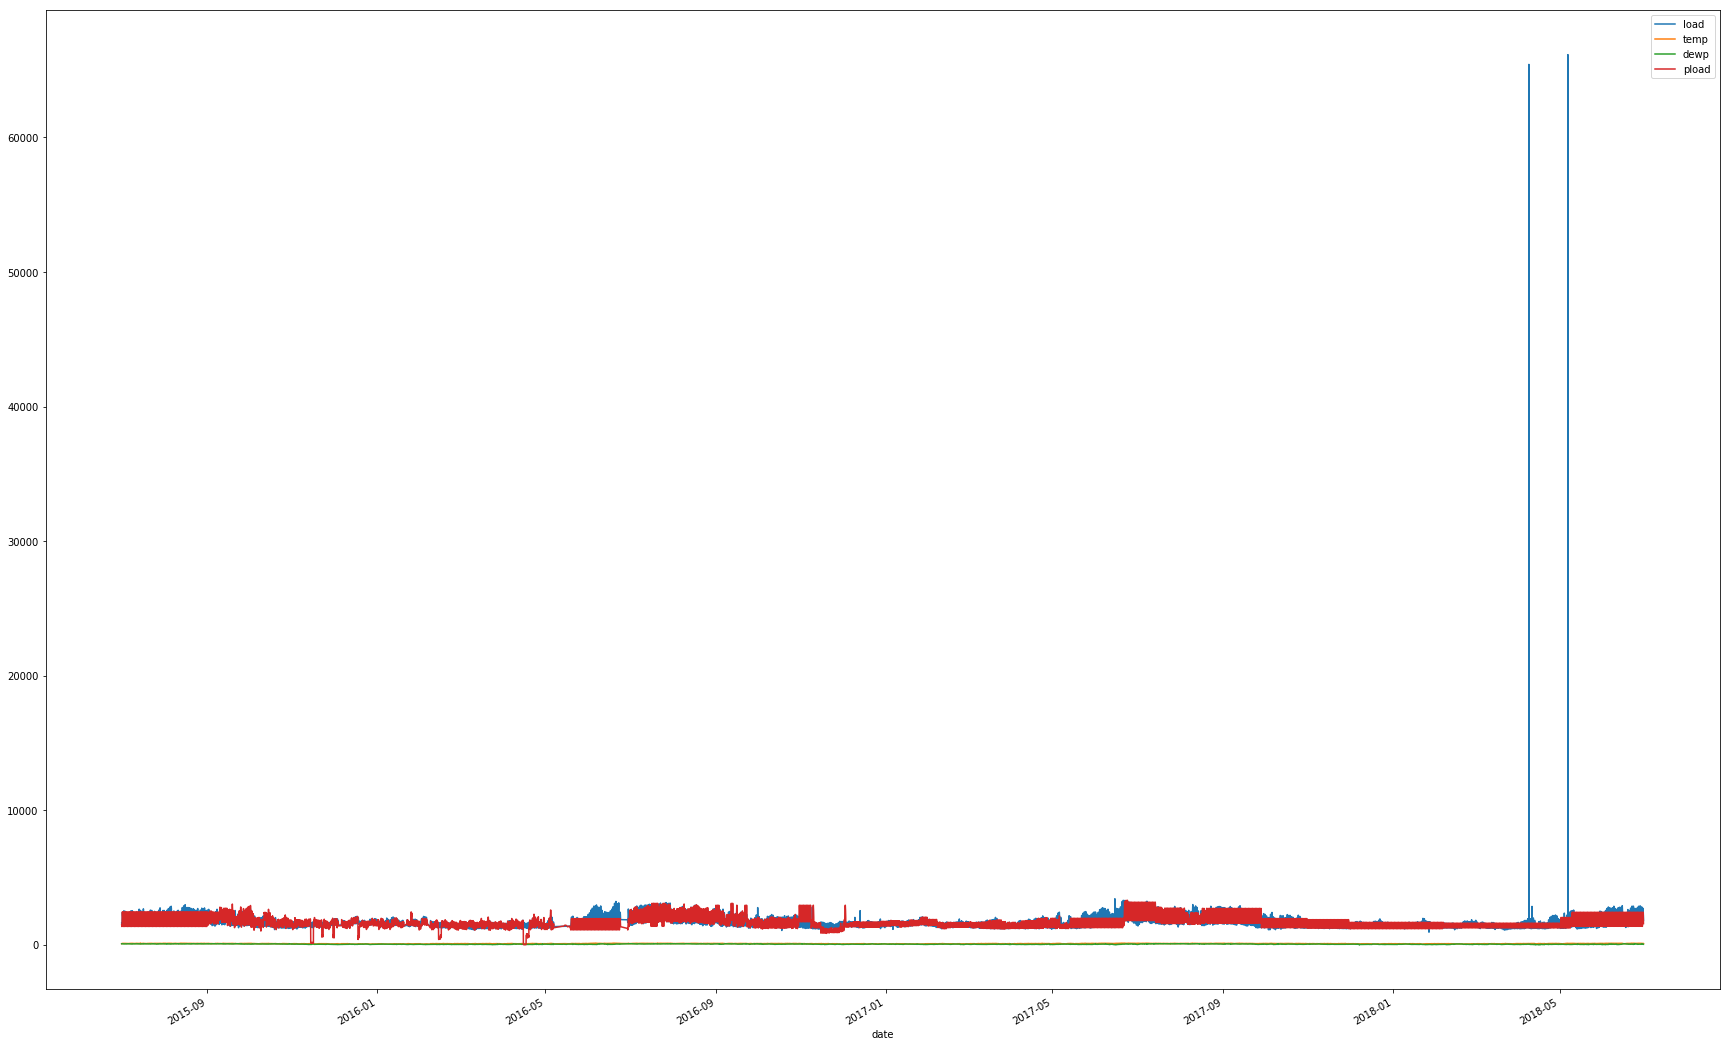

In [19]:
adf.plot(figsize=(30,20))

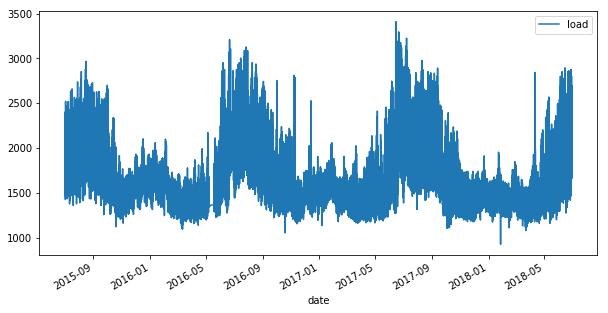

In [44]:
ldf[ldf.load < 10000][:'2018-07'].plot(figsize=(10,5))

In [38]:
ldf[ldf.load < 1000]

,load,work
date,,
2018-01-26 23:00:00,927.0,True
2018-12-03 08:00:00,822.0,True
2018-12-03 09:00:00,811.0,True
2018-12-03 10:00:00,815.0,True
2018-12-03 11:00:00,840.0,True
2018-12-03 12:00:00,908.0,True


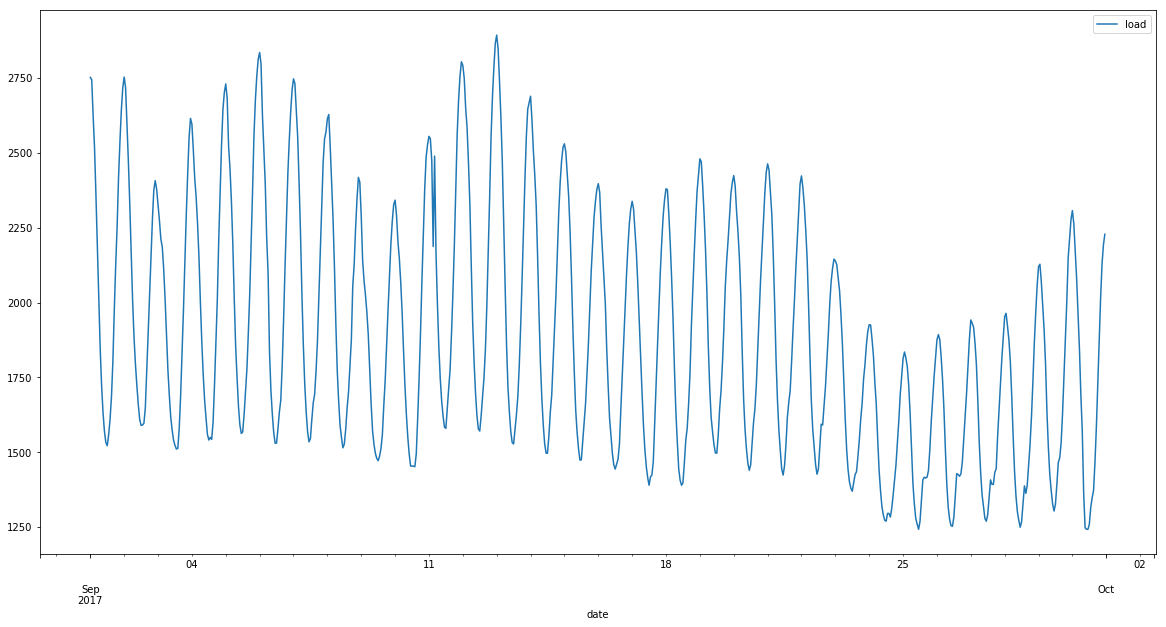

In [14]:
loaddf['2017-9'].plot(figsize=(20,10))

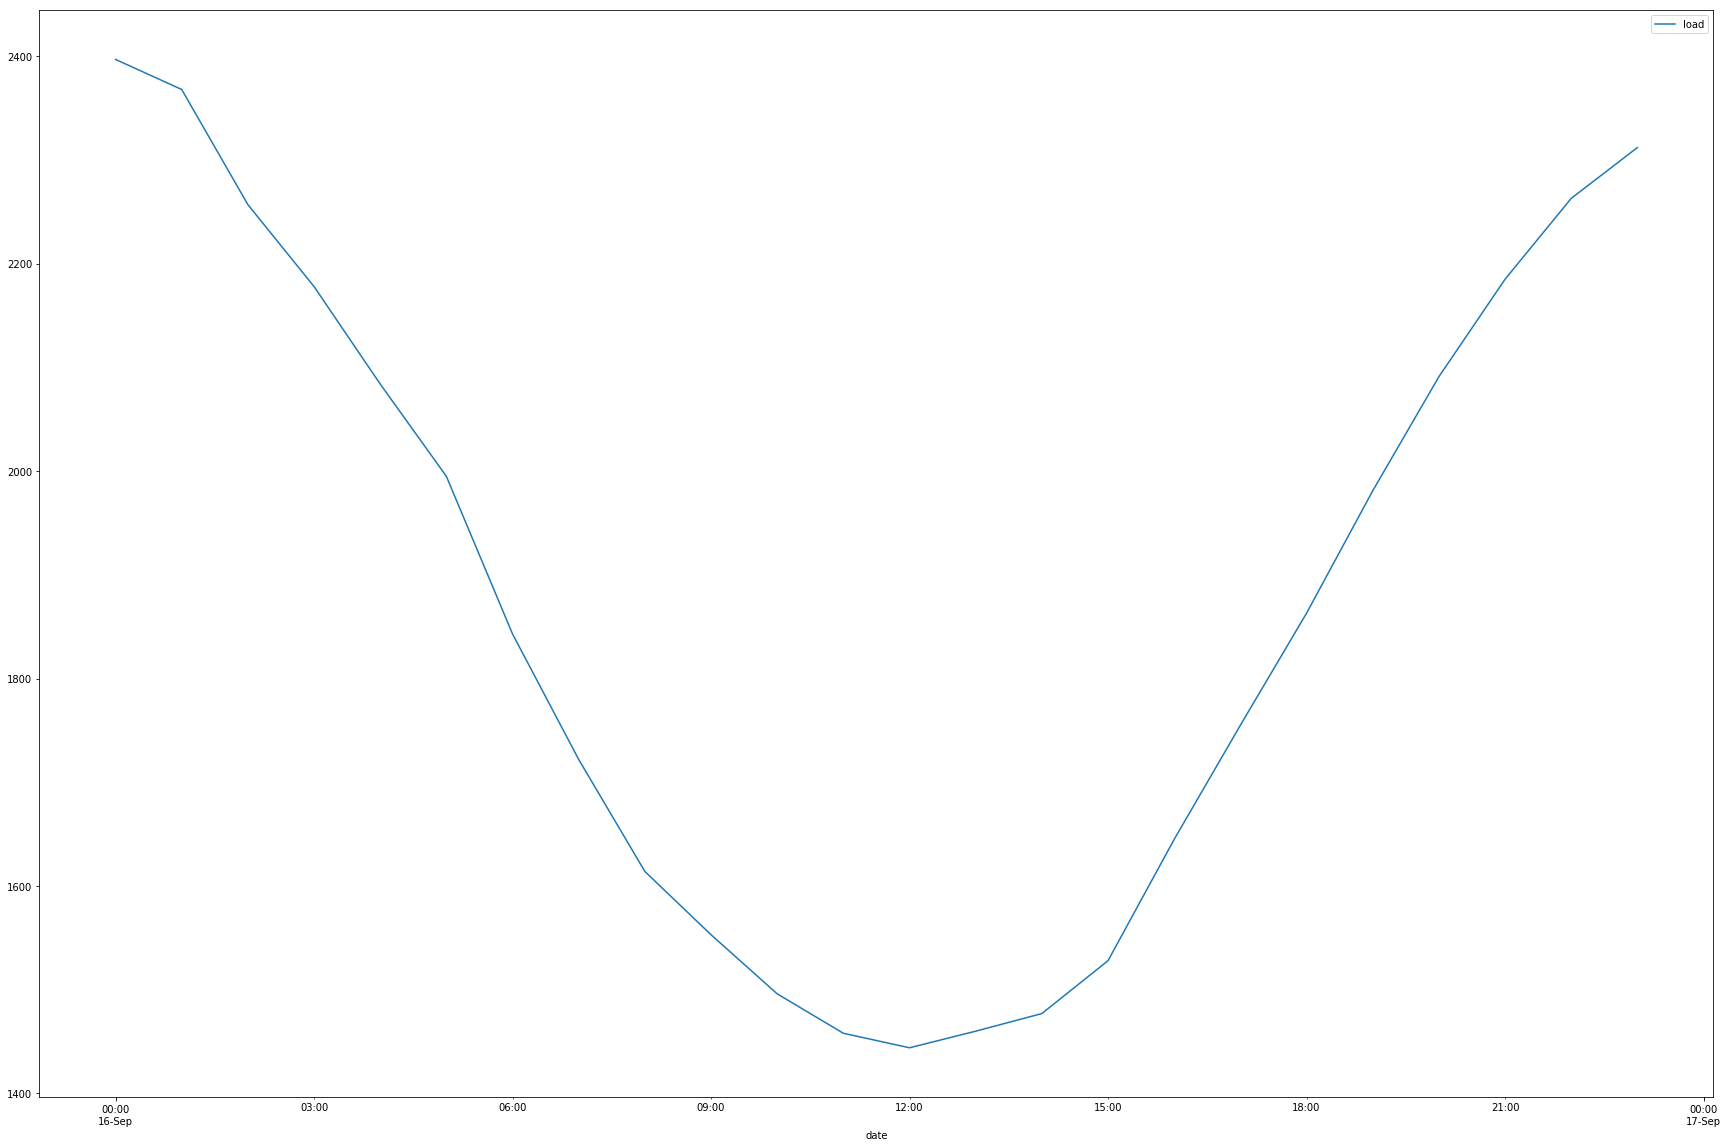

In [158]:
loaddf.set_index(['date'])['2017-9-16'].plot(figsize=(30,20))

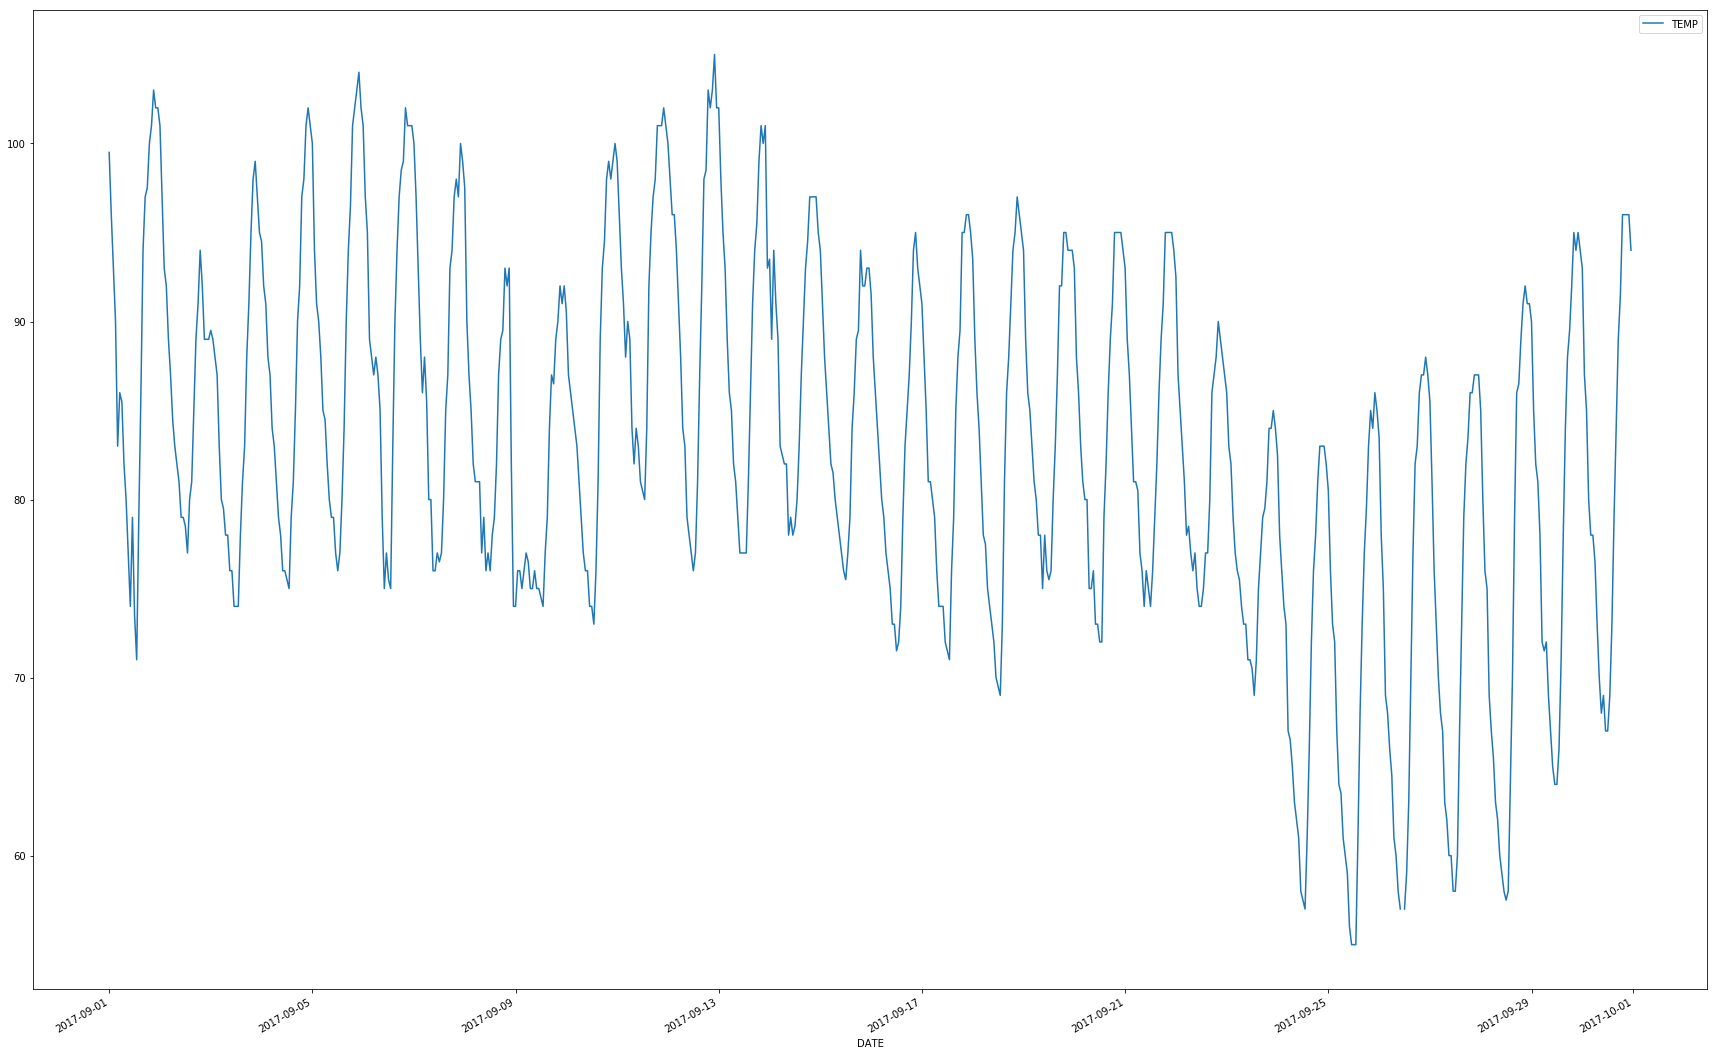

In [149]:
weatherdf2['2017-9'].plot(figsize=(30,20))

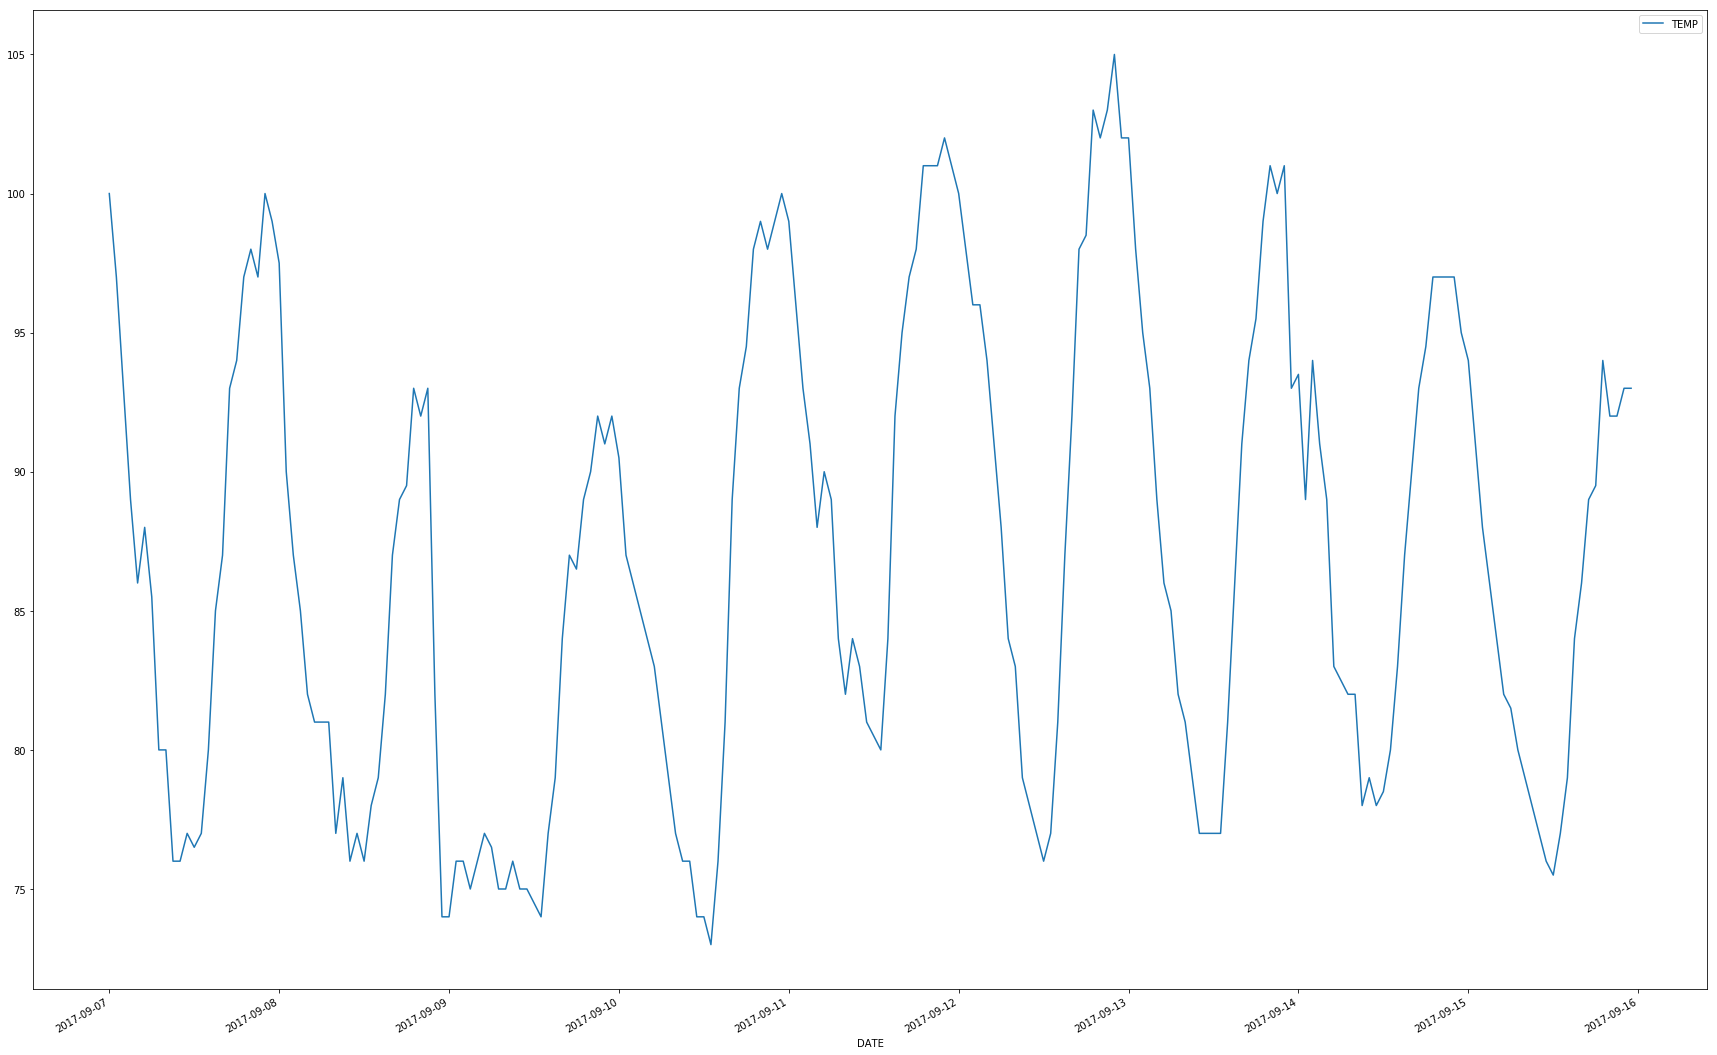

In [153]:
weatherdf2['2017-9-7':'2017-9-15'].plot(figsize=(30,20))